<a href="https://colab.research.google.com/github/Eden-Green12/Customer_Churn_Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Customer churn prediction** 
Using ANN


In [2]:
import pandas as pd 

In [5]:
df = pd.read_csv("/content/telco_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.drop('customerID',axis="columns",inplace=True)

In [8]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [10]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df1 = df[df.TotalCharges!= " "]
df1.shape

(7032, 20)

In [12]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [13]:
import matplotlib.pyplot as plt 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


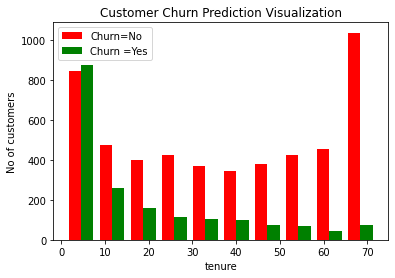

In [14]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('No of customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([tenure_churn_no,tenure_churn_yes],color=['red','green'],label=['Churn=No','Churn =Yes'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


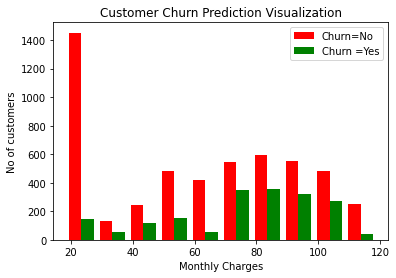

In [15]:
tenure_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
tenure_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('No of customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([tenure_churn_no,tenure_churn_yes],color=['red','green'],label=['Churn=No','Churn =Yes'])
plt.legend()

In [16]:
def unique_values():
  for column in df1:
   if df1[column].dtypes == 'object':
     print(column, " = " ,df1[column].unique())

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


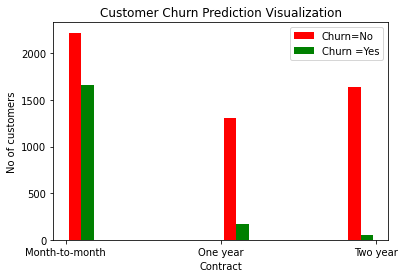

In [17]:
tenure_churn_no = df1[df1.Churn == 'No'].Contract
tenure_churn_yes = df1[df1.Churn == 'Yes'].Contract

plt.xlabel('Contract')
plt.ylabel('No of customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([tenure_churn_no,tenure_churn_yes],color=['red','green'],label=['Churn=No','Churn =Yes'])
plt.legend()

In [18]:
df1.replace('No internet service','No', inplace = True)
df1.replace('No phone service','No', inplace = True)
unique_values()

gender  =  ['Female' 'Male']
Partner  =  ['Yes' 'No']
Dependents  =  ['No' 'Yes']
PhoneService  =  ['No' 'Yes']
MultipleLines  =  ['No' 'Yes']
InternetService  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  =  ['No' 'Yes']
OnlineBackup  =  ['Yes' 'No']
DeviceProtection  =  ['No' 'Yes']
TechSupport  =  ['No' 'Yes']
StreamingTV  =  ['No' 'Yes']
StreamingMovies  =  ['No' 'Yes']
Contract  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  =  ['Yes' 'No']
PaymentMethod  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  =  ['No' 'Yes']


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [19]:
df1.replace({'Yes':1,'No':0},inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [20]:
df1['gender'].replace({'Male':0,'Female':1},inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [21]:
unique_values()

InternetService  =  ['DSL' 'Fiber optic' 0]
Contract  =  ['Month-to-month' 'One year' 'Two year']
PaymentMethod  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [22]:
#one hot encoding 
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [23]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [24]:
X = df2.drop("Churn",axis='columns')
y = df2["Churn"]

In [25]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [26]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 5)

In [28]:
X_train.shape


(5625, 26)

In [29]:
y_train.shape

(5625,)

In [30]:
X_test.shape

(1407, 26)

In [32]:
import tensorflow as tf 
from tensorflow import keras

model = keras.Sequential([
                          
                          keras.layers.Dense(20,input_shape=(26,),activation ='relu'),
                          # keras.layers.Dense(15,activation ='relu'),
                          keras.layers.Dense(1,activation = 'sigmoid'),

])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs = 100)

Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 0.6273 - accuracy: 0.6437
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4631 - accuracy: 0.7838
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4342 - accuracy: 0.7940
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4249 - accuracy: 0.7982
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4193 - accuracy: 0.8016
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4156 - accuracy: 0.8020
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4136 - accuracy: 0.8030
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4110 - accuracy: 0.8062
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4099 - accuracy: 0.8073
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4086 - accura

In [33]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.4567 - accuracy: 0.7768


[0.4567314386367798, 0.7768301367759705]

In [35]:
y_test.shape

(1407,)

In [36]:
yp = model.predict(X_test)
yp[:5]

array([[0.25600427],
       [0.5180452 ],
       [0.01150073],
       [0.8284118 ],
       [0.5177406 ]], dtype=float32)

In [37]:
y_pred = []
for i in yp:
  if i > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)  

In [ ]:
y_pred

In [39]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       999
           1       0.66      0.48      0.55       408

    accuracy                           0.78      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.76      0.78      0.77      1407



Text(42.0, 0.5, 'Truth')

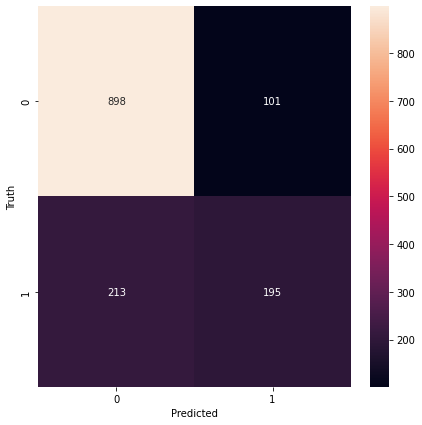

In [41]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(7,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')